# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

**Выводы:**

...

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

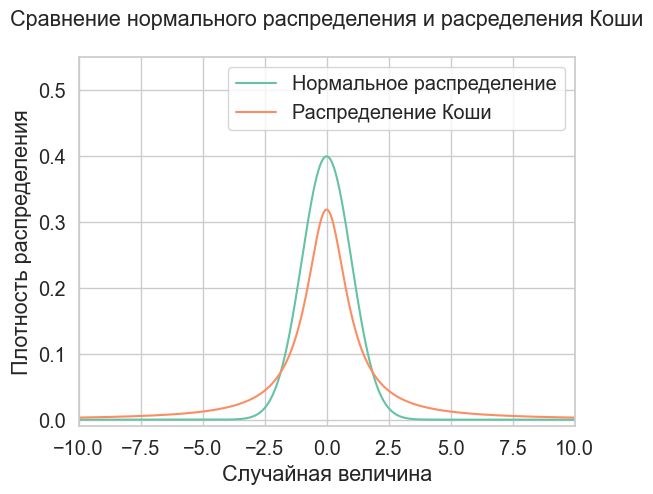

In [13]:
grid = np.linspace(-10, 10, 2000)
plt.plot(grid, sps.norm.pdf(grid), label='Нормальное распределение')
plt.plot(grid, sps.cauchy.pdf(grid), label='Распределение Коши')
plt.xlabel('Случайная величина')
plt.ylabel('Плотность распределения')
plt.ylim(-0.01, 0.55)
plt.xlim(-10, 10)
plt.title('Сравнение нормального распределения и расределения Коши\n')
plt.legend()
plt.show()

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Проведём один эксперимент и посмотрим на поведение среднего

In [16]:
size = 1000
samples = sps.cauchy.rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)

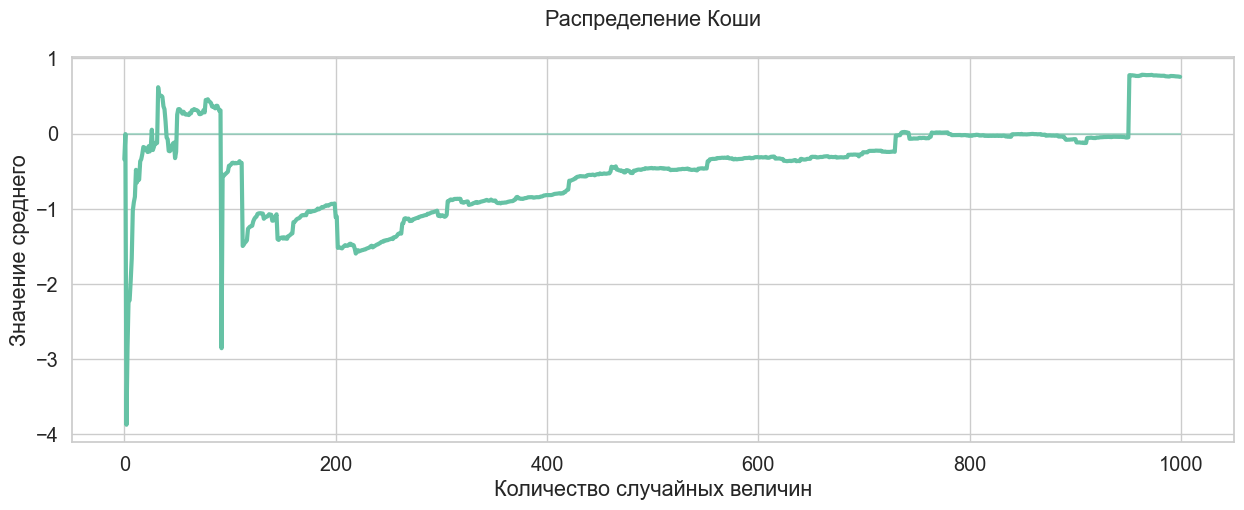

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(cum_means, lw=3)
plt.hlines(0, 0, size, alpha=0.5)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.title('Распределение Коши\n')
plt.show()

Проведём 10 экспериментов:

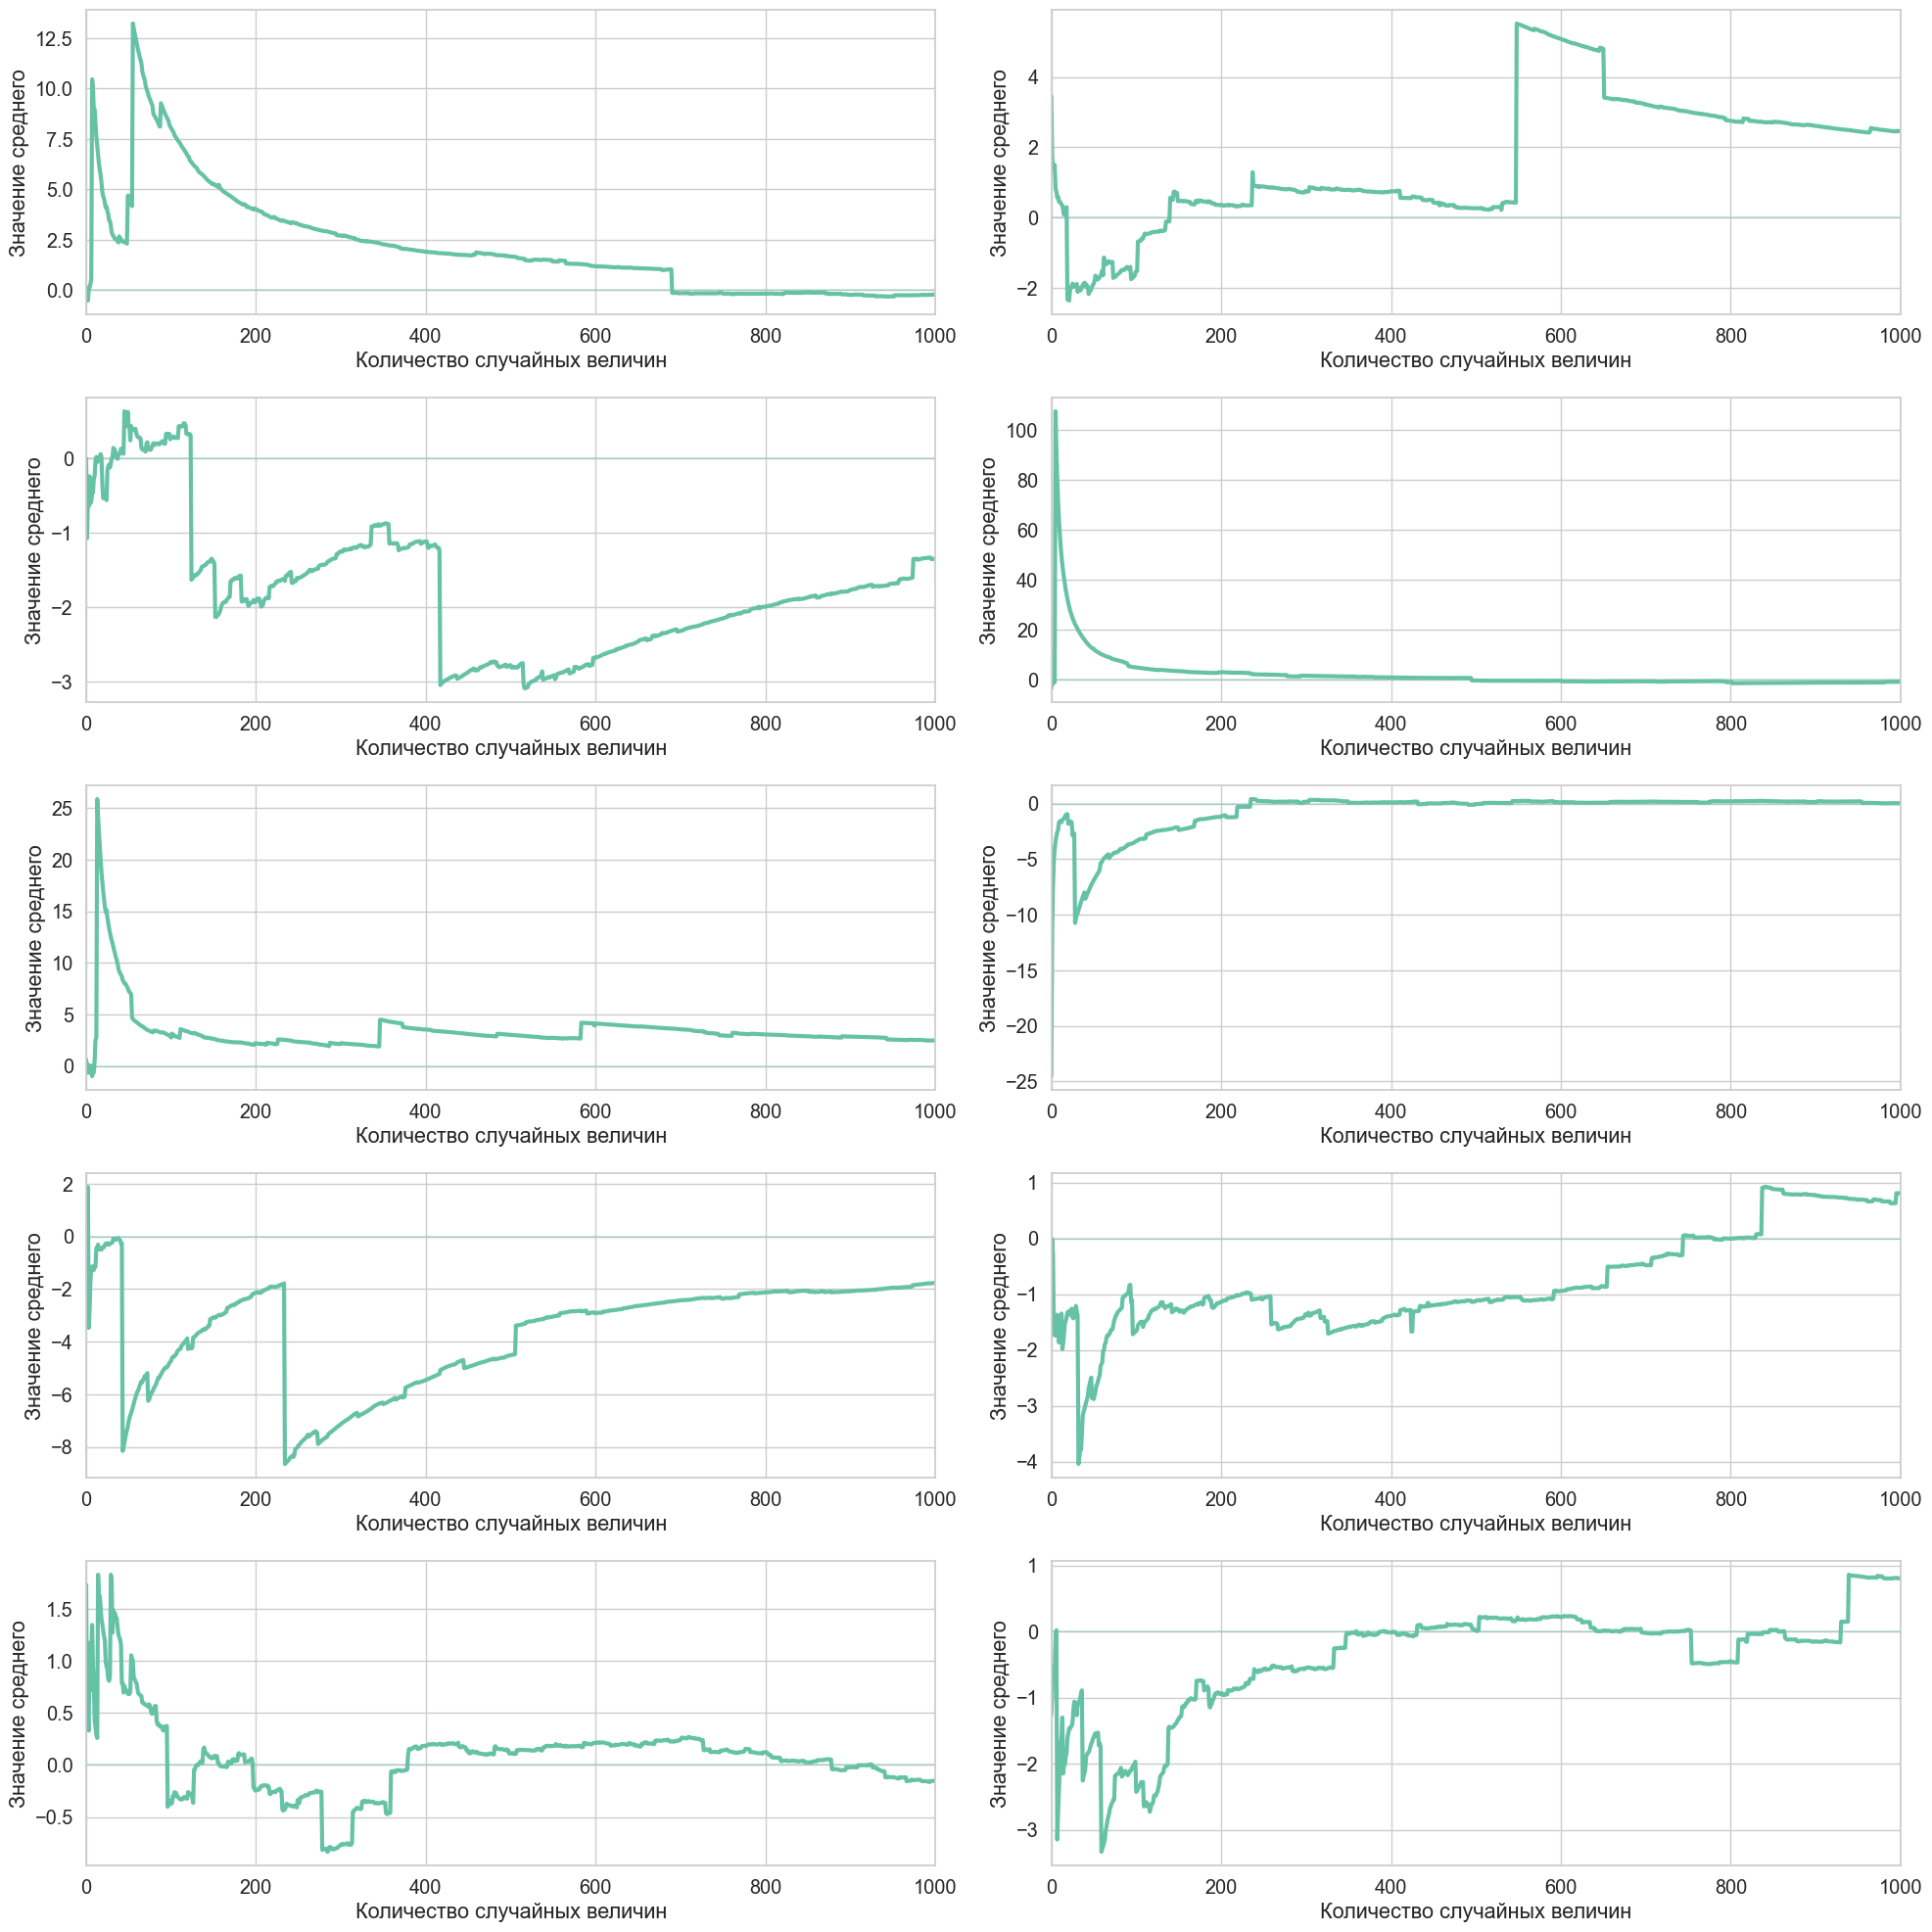

In [30]:
plt.figure(figsize=(20, 20))

size = 1000
for i in range(10):

    # Генерируем выборку
    samples = sps.cauchy.rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((0, size))
    
plt.tight_layout()

Видим, что среднее стремится к разным значениям. Это связано с тем, что у распределения Коши нет математического ожидания. Поэтому ЗБЧ не может быть выполнен. Убедимся в этом, проведя большое чсило экспериментов. 

In [32]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

(-200.0, 200.0)

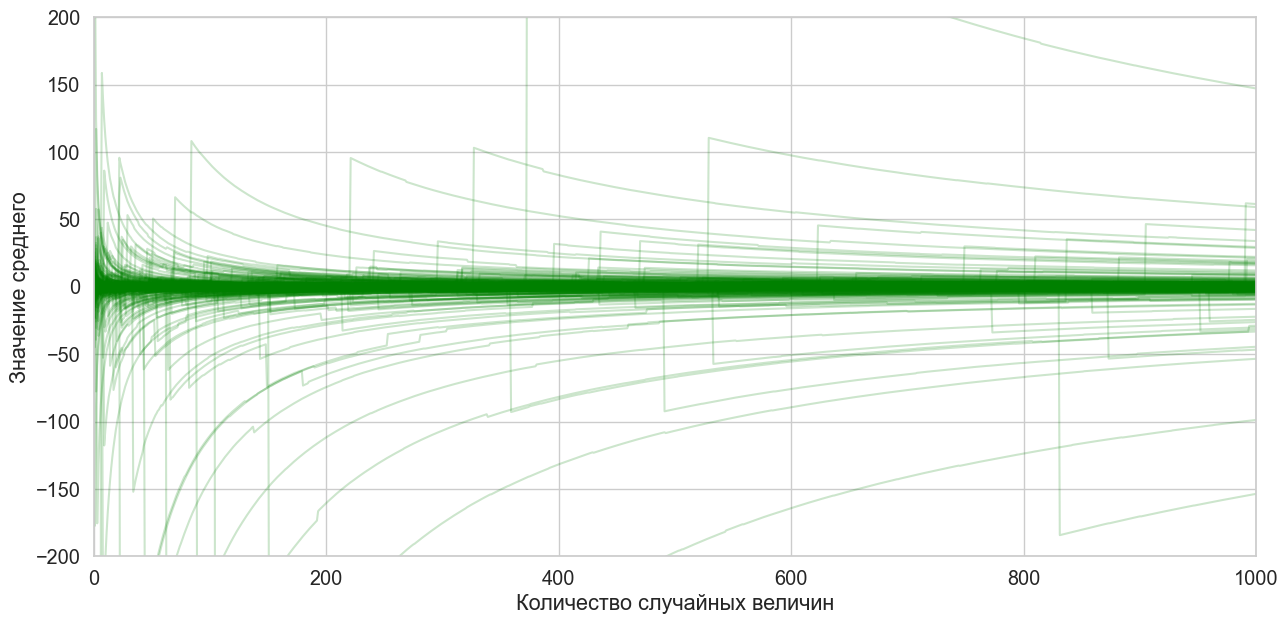

In [44]:
plt.figure(figsize=(15, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.2)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.ylim(-200, 200)

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

In [57]:
def median_array(samples):  
    '''
    Функция вычисления медианы для последовательных подвыборок выборки 
    '''
    
    list_answer = []
    for n in range(1, samples.shape[0] + 1):
        median = np.median(samples[0:n])
        list_answer.append(median)
    
    return np.array(list_answer)

Проведём один эскперимент:

In [79]:
size = 1000
samples = sps.cauchy.rvs(size=size)
sample_meds = median_array(samples) / (np.arange(size) + 1)

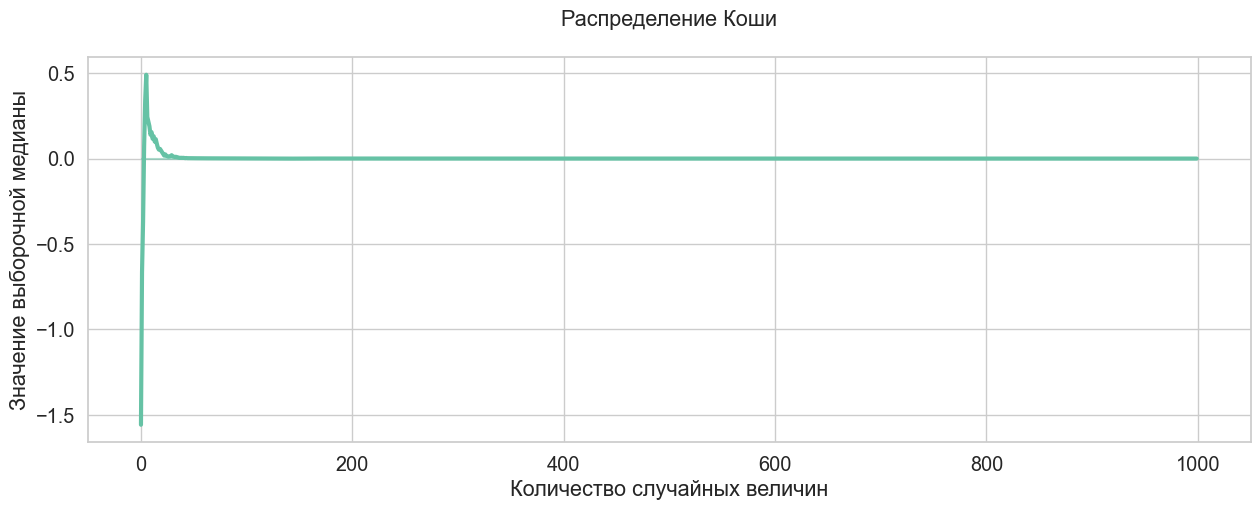

In [80]:
plt.figure(figsize=(15, 5))
plt.plot(sample_meds, lw=3)
plt.hlines(0, 0, size, alpha=0.5)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значениe выборочной медианы')
plt.title('Распределение Коши\n')
plt.show()

Выглядит так, что медиана сходится к значению случайной величины, имеющему самую большую плотность. Проведём ещё несколько экспериментов:

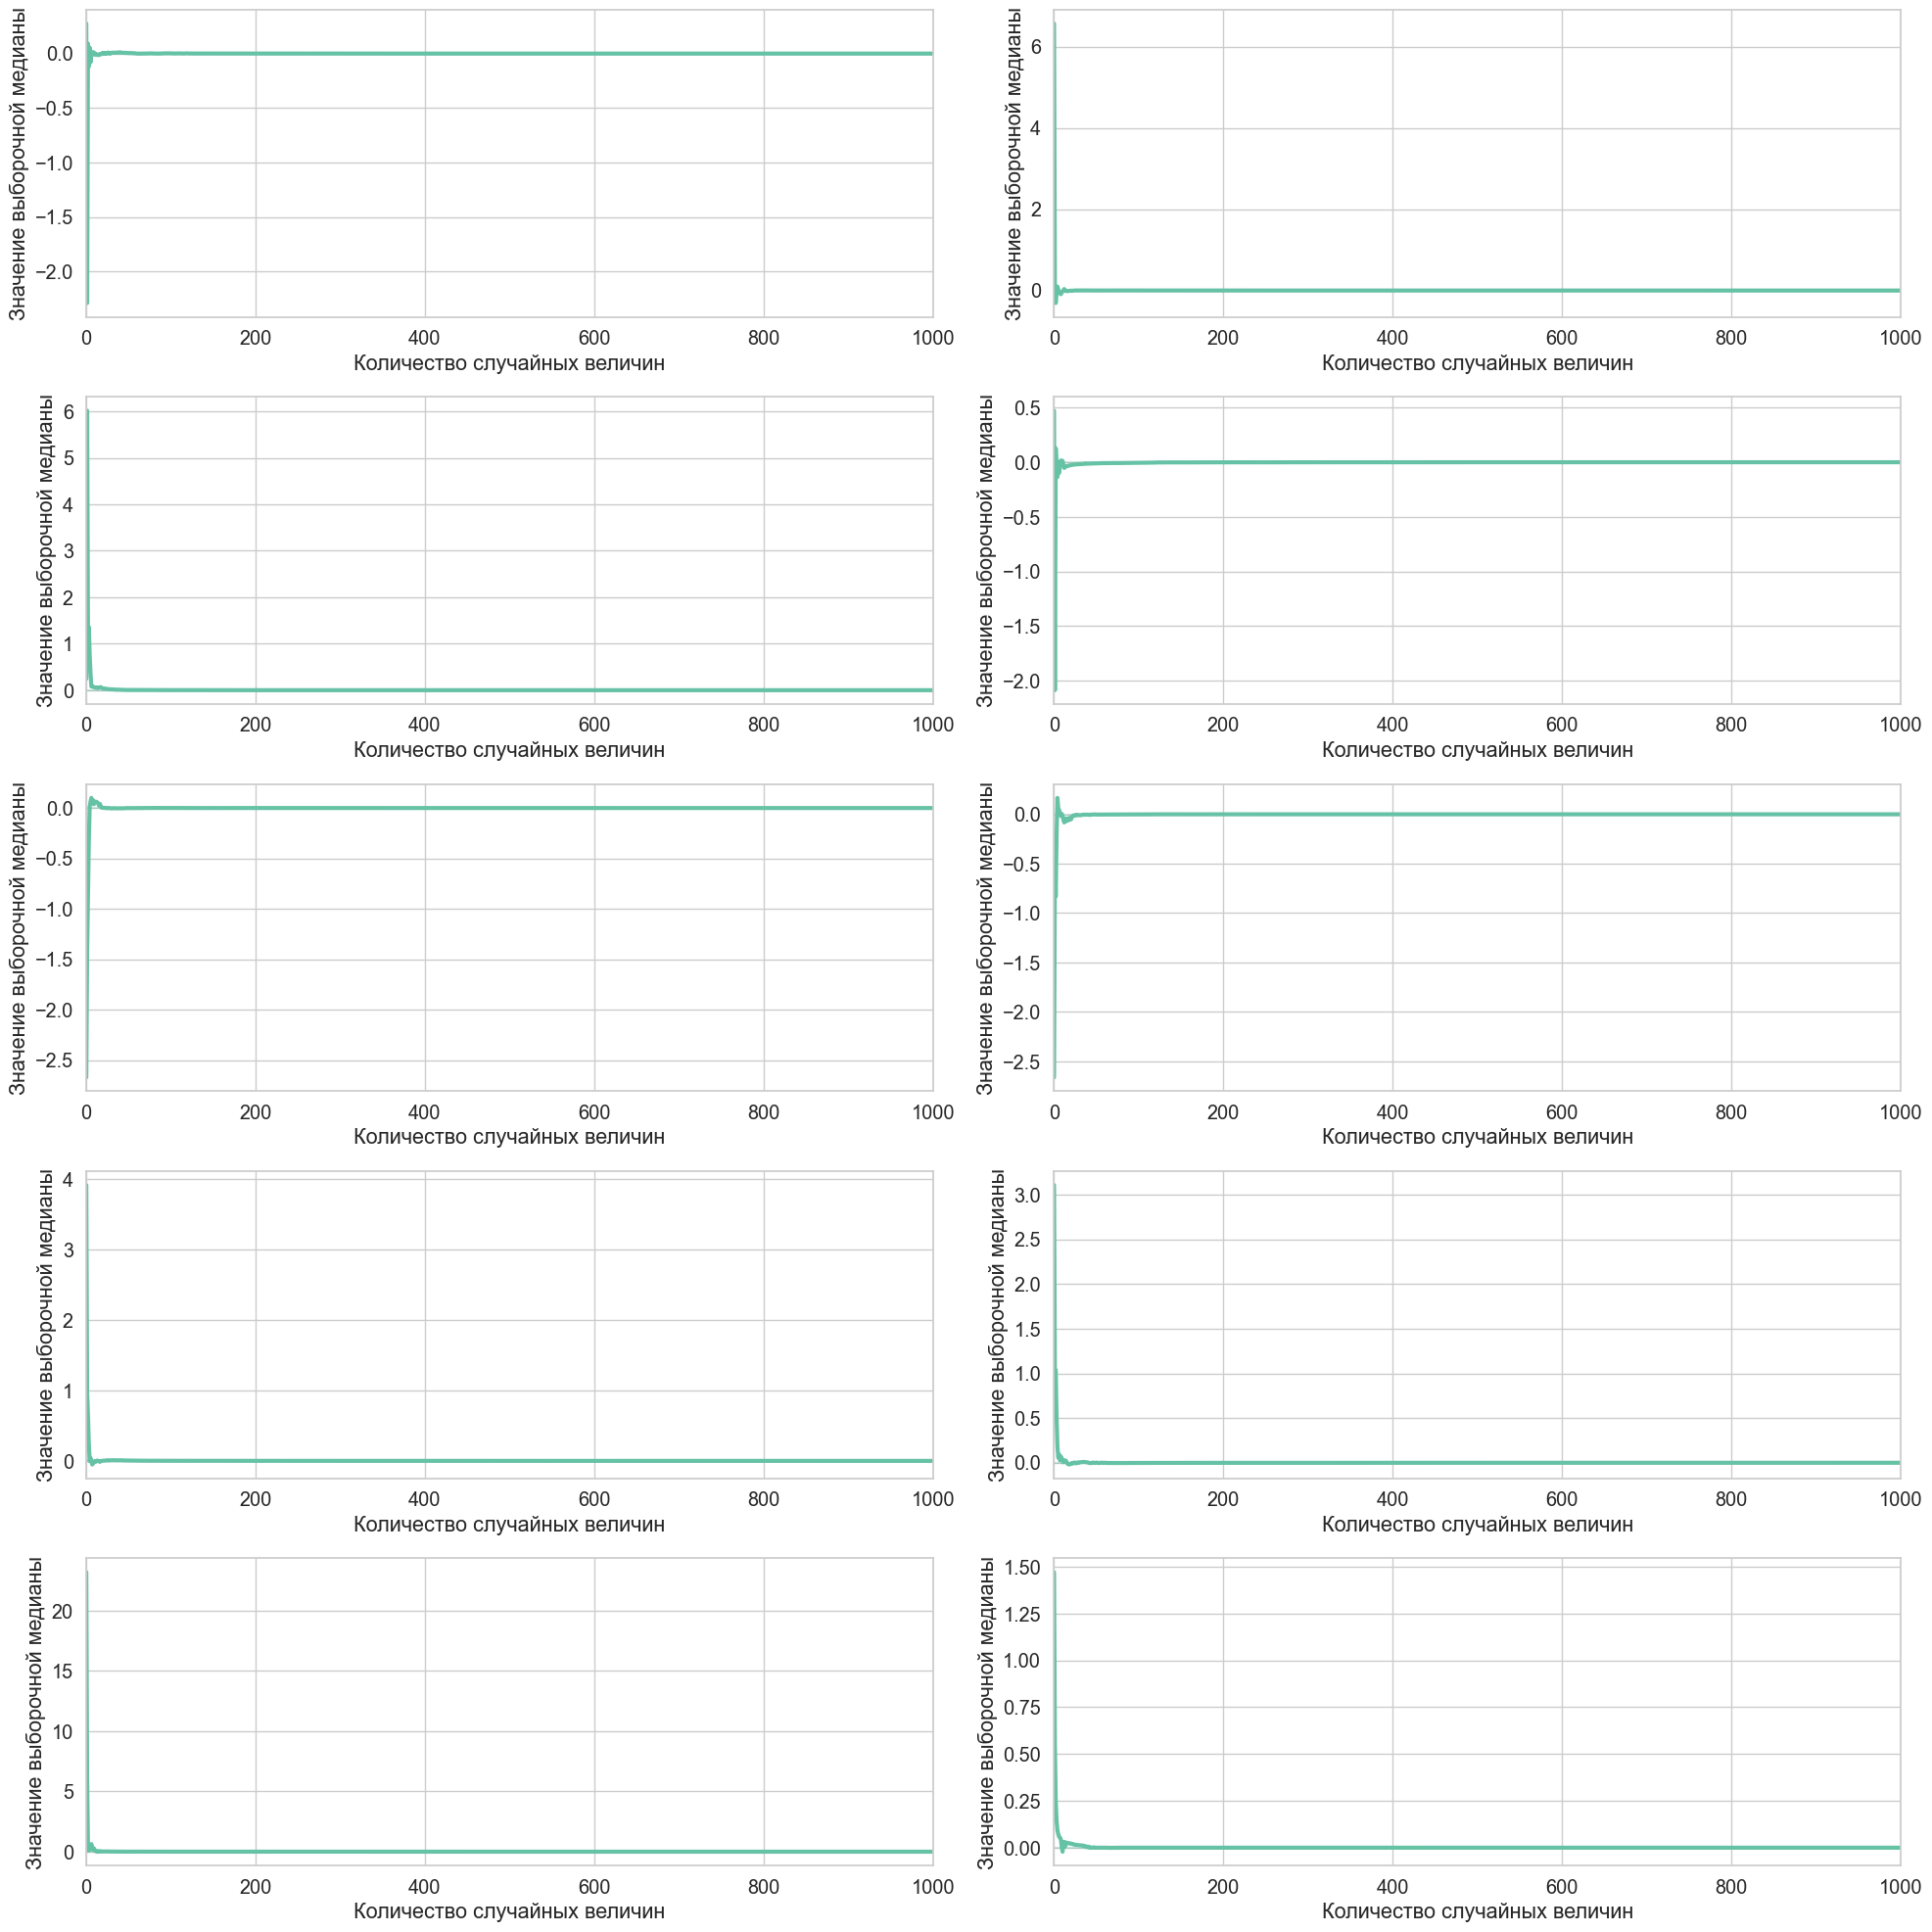

In [78]:
plt.figure(figsize=(20, 20))

size = 1000
for i in range(10):

    # Генерируем выборку
    samples = sps.cauchy.rvs(size=size)
    sample_meds = median_array(samples) / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(sample_meds, lw=3)
    plt.hlines(0, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение выборочной медианы')
    plt.xlim((0, size))
    
plt.tight_layout()

И, чтобы окончательно убедиться в этом предположении, построим много графиков:

In [81]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))

list_of_meds_array = []
for sample in samples:
    list_of_meds_array.append(median_array(sample))

medians = np.array(list_of_meds_array) / (np.arange(size) + 1)

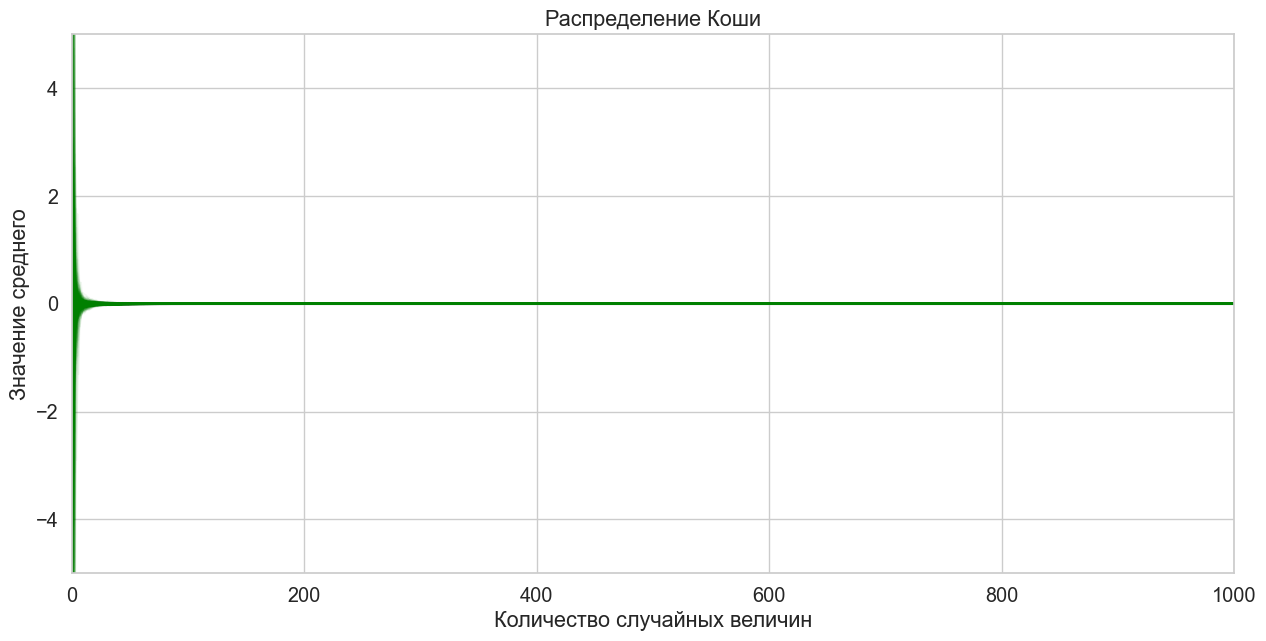

In [82]:
plt.figure(figsize=(15, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, medians[i], color='green', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.ylim(-5, 5)
plt.title('Распределение Коши')
plt.show()

**Вывод:**
* В отличие от нормального рапсределения, распределение Коши имеет тяжёлые хвосты, из-за чего оно не имеет математического ожидания.
* В силу этой причины Закон Больших Чисел для него не выполняется.
* Но, несмотря на это, выборочная медиана при увеличении выборки стремится к значению случайной величины, имеющему самую большую плотность.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Наёдем $n$, при котором функция отклонения в первый раз принимает значение $F(n) \leqslant 0.02$

In [120]:
def min_n_for_p_bern(p, err):
    size = 1000  # количество случайных величин
    samples_count = 500  # количество выборок
    
    samples = sps.bernoulli.rvs(p, size=(samples_count, size))  # создали выборки
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)  # посчитали выборочные средние
    F = np.abs((cum_means - p)).sum(axis=0) / samples_count  # нашли меру отклонения
    n = np.asarray(F <= err).nonzero()[0][0]
    
    return n

In [121]:
min_ind_n = min_n_for_p_bern(0.5, 0.02)
print(f'При {min_ind_n + 1} элементах в выборке отклонение принимает приемлемое значение.')

При 416 элементах в выборке отклонение принимает приемлемое значение.


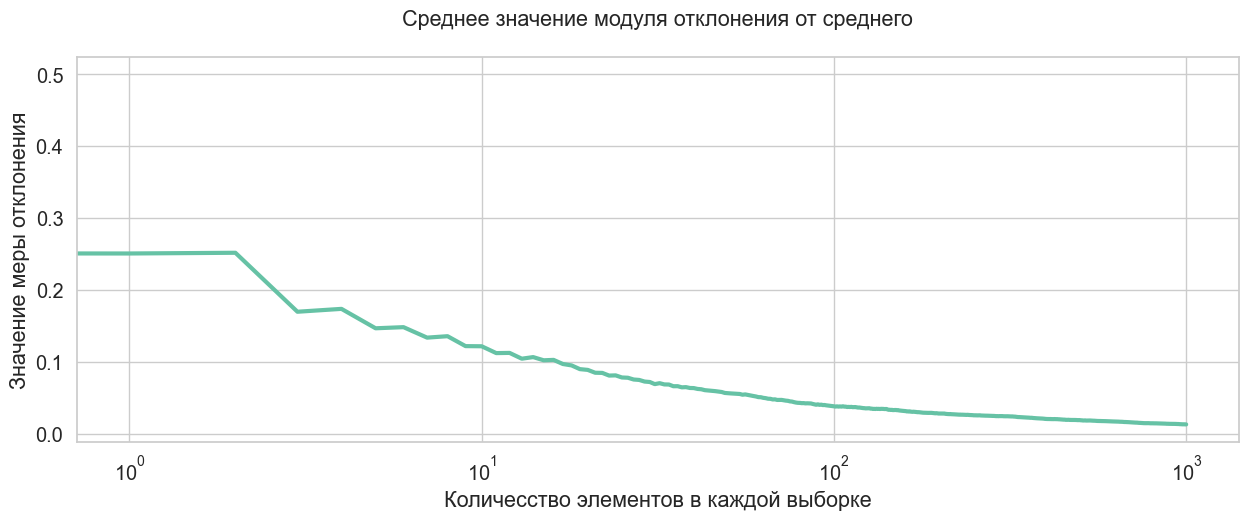

In [155]:
graph = plt.figure(figsize=(15, 5))
plt.plot(F, lw=3)
plt.xlabel('Количесство элементов в каждой выборке')
plt.ylabel('Значение меры отклонения')
plt.title('Среднее значение модуля отклонения от среднего\n')
plt.xscale("log")
plt.show()

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

In [137]:
p_array = np.arange(0.05, 0.96, 0.05)
n_array = []
err = 0.02  # допустимое отклонение

for p in p_array:
    n_array.append(min_n_for_p_bern(p, err))
    
n_array = np.array(n_array)

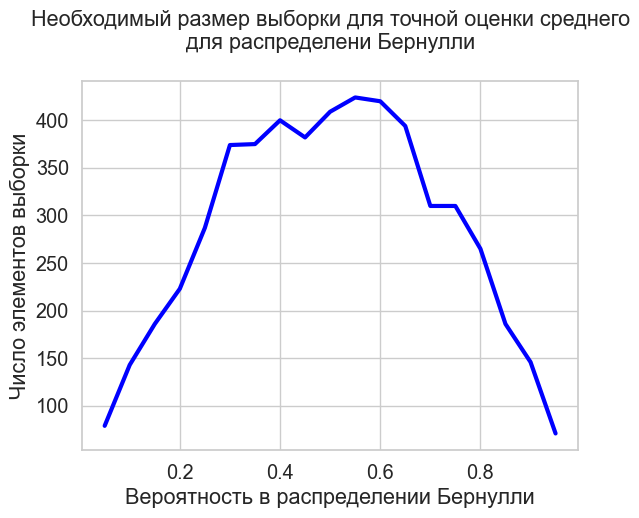

In [142]:
plt.plot(p_array, n_array, lw=3, color='blue')
plt.xlabel('Вероятность в распределении Бернулли')
plt.ylabel('Число элементов выборки')
plt.title('Необходимый размер выборки для точной оценки среднего\nдля распределени Бернулли\n')
plt.show()

**Выводы:**
* С увеличением числа элементов в выборке отклонение выборочного среднего от истинного значения уменьшается.
* Существует зависимость числа элементов в выборке от параметра в распределении Бернулли. Чем вероятность ближе к половине, тем больше нужна выборка для требуемой оценки. Для маленьких значений $p$ или $(p - 1)$ возможно использовать более скромную выборку для достижения той же оценки.